In [73]:
# imports
import pandas as pd
import numpy as np
import os # use this to access your environment variables
import requests # this will be used to call the APIs
import json
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
FOURSQUARE_KEY = os.getenv('FOURSQUARE_API_KEY')

In [2]:
df=pd.read_csv('Paris_data.csv')
df=df.head(500) # limiting my data to 500 to reduce the API request and saving it as a new data frame for this notebook 
df

,name_of_station,empty_slots,free_bikes,latitude,longitude,timestamp,lat&lon
0,Benjamin Godard - Victor Hugo,32,3,48.865983,2.275725,2023-12-04T04:49:10.102000Z,48.865983_2.275725
1,André Mazet - Saint-André des Arts,33,21,48.853756,2.339096,2023-12-04T04:49:09.860000Z,48.853756_2.339096
2,Faubourg Du Temple - Republique,26,11,48.867872,2.364898,2023-12-04T04:49:07.405000Z,48.867872_2.364898
3,Beaux-Arts - Bonaparte,11,9,48.856452,2.334852,2023-12-04T04:49:07.921000Z,48.856452_2.334852
4,Toudouze - Clauzel,15,6,48.879296,2.337360,2023-12-04T04:49:08.016000Z,48.879296_2.33736
...,...,...,...,...,...,...,...
495,Mozart - Jasmin,60,1,48.852861,2.268484,2023-12-04T04:49:07.954000Z,48.852861_2.268484
496,Boulets - Faubourg Saint-Antoine,36,7,48.849259,2.391755,2023-12-04T04:49:08.860000Z,48.849259_2.391755
497,Haies - Réunion,16,6,48.853869,2.402426,2023-12-04T04:49:08.680000Z,48.853869_2.402426
498,Maine - Antoine Bourdelle,14,3,48.843085,2.320264,2023-12-04T04:49:10.012000Z,48.843085_2.320264


# Foursquare

### Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [3]:
def get_venues_fs(latitude, longitude):
    """
    Get venues from foursquare with coordinates.
    Args:
        latitude (float): latitude for query (must be combined with longitude)
        longitude (float): longitude for query (must be combined with latitude)
            
    Returns:
        response: response object from the requests library.
    """
    URL = 'https://api.foursquare.com/v3/places/search'
    # Prepare parameters for the API request
    params = {
        'll': f'{latitude},{longitude}',  # latitude and longitude
        'radius': 1000,  # radius around the location
        'categories':["13000,10000,12013,15008"],
        'limit':50 # limit the number of outputs in the categories
            }
    headers = {
        "Accept": "application/json",
        "Authorization": FOURSQUARE_KEY
                }

    response = requests.get(URL,params=params,headers=headers)
    return response

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3406215698.py, line 16)

In [130]:
four_sq_data=[]

counter=0 # to count each iteration

max_count=20 # the max count before saving data to a file in the libarary

id=0 # for name of the file based on iteration

for index, row in df.iterrows():
    # Extract latitude and longitude from the current row
    lat, lon = row['latitude'], row['longitude']
    res = get_venues_fs(lat,lon)
    if res.status_code == 200:
        data = res.json()
        four_sq_data.append(data)# add data from each coordinate to a list
        if (counter%max_count==0) and (counter>0): # condition for interval of monitoring
            print(str(counter)+ " rows has been processed") # statement to see the progress of the data being pulled
            # saving the raw json file
            with open(f'four_sq_data_{id}.json', 'w') as f:
                json.dump(four_sq_data, f)
                id+=1 # incrementing the file number
    else:
        print(f"Error: {res.status_code}, {res.text}")
    # if index>=max_count: only for testing phase to stop the iterations
    #     break
    counter+=1
with open(f'four_sq_data_final.json', 'w') as f:
     json.dump(four_sq_data, f)


20 rows has been processed
40 rows has been processed
60 rows has been processed
80 rows has been processed
100 rows has been processed
120 rows has been processed
140 rows has been processed
160 rows has been processed
180 rows has been processed
200 rows has been processed
220 rows has been processed
240 rows has been processed
260 rows has been processed
280 rows has been processed
300 rows has been processed
320 rows has been processed
340 rows has been processed
360 rows has been processed
380 rows has been processed
400 rows has been processed
420 rows has been processed
440 rows has been processed
460 rows has been processed
480 rows has been processed


In [14]:
print(len(four_sq_data))

500


###### Below we are doing one final dump to get the remainder of data that does not match the conditional statement to get a json file with all 500 Data points

In [131]:
with open(f'four_sq_data_final.json', 'w') as f:
     json.dump(four_sq_data, f)

In [6]:
# to load a file from the saved json file so it does not need to be pulled from the API
with open('four_sq_data_final.json') as f:
       four_sq_data = json.load(f)

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [7]:
# to make a lat_lon string column
location = []
name = []
latitude=[]
longitude=[]
for i in range(0,len(df)):
    lat=df['latitude'].iloc[i]
    lon=df['longitude'].iloc[i]
    latitude.append(lat)
    longitude.append(lon)
    

    a=four_sq_data[i]['results']
    
    for j in range (0,len(a)):
        # latitude.append(lat)
        # longitude.append(lon)
        loc=a[j]['location']
        address = loc.get('address') # check if address exists in the dictionary ,can take a string argument to give a replacement
        #location.append(a[j]['location']['address']) # this method did not work as there were some rows with missing information for address
        location.append(address)
        name.append(a[j]['name'])
                
print(len(latitude),len(location), len(name))



500 23898 23898


In [8]:
temp_df = pd.DataFrame({'latitude':latitude,
                        'longitude':longitude},dtype=str)
temp_df['lat_lon']=temp_df['latitude']+"_"+temp_df['longitude']
temp_df

,latitude,longitude,lat_lon
0,48.865983,2.275725,48.865983_2.275725
1,48.85375581057431,2.3390958085656166,48.85375581057431_2.3390958085656166
2,48.867872484749,2.3648982158072,48.867872484749_2.3648982158072
3,48.856451985395786,2.334851883351803,48.856451985395786_2.334851883351803
4,48.87929591733507,2.3373600840568547,48.87929591733507_2.3373600840568547
...,...,...,...
495,48.85286124871689,2.268483570651513,48.85286124871689_2.268483570651513
496,48.849259262115,2.3917546141943,48.849259262115_2.3917546141943
497,48.85386896766491,2.402426162238911,48.85386896766491_2.402426162238911
498,48.84308531746595,2.320263946784738,48.84308531746595_2.320263946784738


In [14]:
temp_df.to_csv('lat&lon.csv',index=False)

Put your parsed results into a DataFrame

In [ ]:
for i in range(0,len(four_sq_data)):
    normalized_df=pd.json_normalize(four_sq_data[i]['results'])
    normalized_df['lat_lon']=temp_df['lat_lon'].iloc[i]
    if i==0:
        final_df=normalized_df.copy()
    else:
        final_df=pd.concat([final_df,normalized_df.copy()],axis=0,ignore_index=True) # add by rows top-down
        

final_df

In [ ]:
final_df.info()

<function matplotlib.pyplot.show(close=None, block=None)>

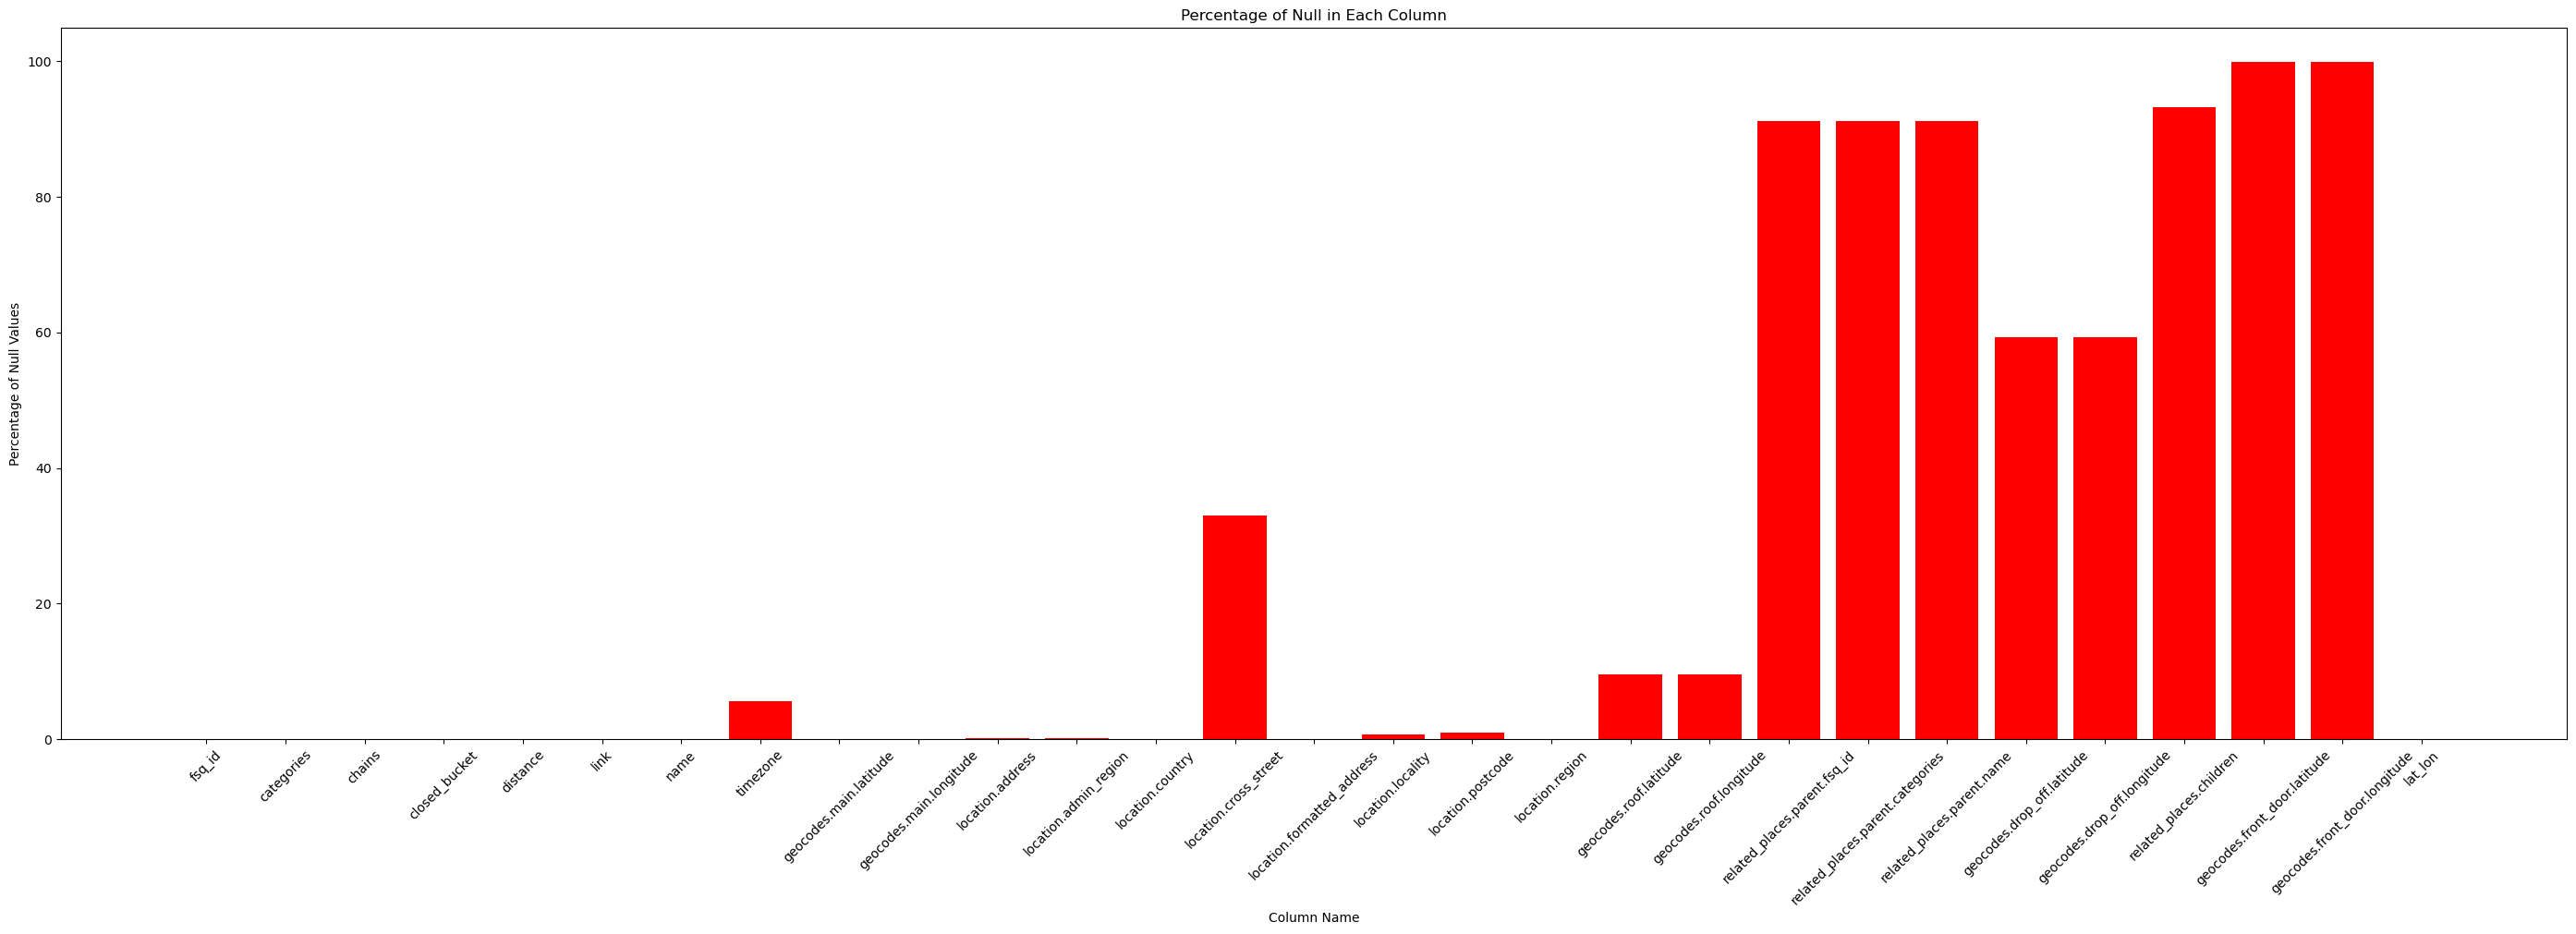

In [93]:
percent_null_data = final_df.isnull().sum()*100/len(final_df)
final_df_columns=final_df.columns.tolist()
# this function shows us the percentage of null values in each column however I am not using a lot of these columns for any exploratory analysis so these can be dropped. before that we can also see the data in a visual representation 

fig,ax = plt.subplots(figsize=(35,10))
ax.bar(final_df_columns,percent_null_data,color='red')
ax.set_ylabel('Percentage of Null Values')
ax.set_xlabel('Column Name')
ax.set_title('Percentage of Null in Each Column')
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\shrut\Documents\light house labs\PROJECTS\Project 2\ppt.png")
plt.show



##### The above bar plot clearly shows how most columns have zero Null values and then there are certain coloumns that have a very high volume of incomplete data and that dropping those columns would be the best way to move forward with this data set.

In [ ]:
# dropping columns with more than 50% null values
# list of columns to drop
columns_to_drop = ['geocodes.front_door.longitude','geocodes.front_door.latitude','related_places.children','geocodes.drop_off.longitude','geocodes.drop_off.latitude','related_places.parent.name',
                  'related_places.parent.categories','related_places.parent.fsq_id']
#to check the list of columns exist in the data frame
columns_to_drop_existing = [col for col in columns_to_drop if col in final_df.columns]
final_df.drop(columns=columns_to_drop_existing,axis=1,inplace=True) 
final_df

In [36]:
#converting the timezone Nan to Europe/Paris as that is the selected area for the data
final_df['timezone']=final_df['timezone'].fillna('Europe/Paris')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23898 entries, 0 to 23897
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fsq_id                      23898 non-null  object 
 1   categories                  23898 non-null  object 
 2   chains                      23898 non-null  object 
 3   closed_bucket               23898 non-null  object 
 4   distance                    23898 non-null  int64  
 5   link                        23898 non-null  object 
 6   name                        23898 non-null  object 
 7   timezone                    23898 non-null  object 
 8   geocodes.main.latitude      23898 non-null  float64
 9   geocodes.main.longitude     23898 non-null  float64
 10  location.address            23852 non-null  object 
 11  location.admin_region       23852 non-null  object 
 12  location.country            23898 non-null  object 
 13  location.cross_street       160

In [53]:
# to make a data frame of only required data
#save this to SQlite
four_sq_df=pd.DataFrame({'lat&lon':final_df['lat_lon'],
             'name_of_business':final_df['name'],
             'distance_on_4sq':final_df['distance'],
             'address':final_df['location.address']
            })

four_sq_df




,lat&lon,name_of_business,distance_on_4sq,address
0,48.865983_2.275725,Noir - Coffee Shop & Torréfacteur,411,32 Rue Gustave Courbet
1,48.865983_2.275725,Saint-James Club,582,43 avenue Bugeaud
2,48.865983_2.275725,Béchu,487,118 avenue Victor Hugo
3,48.865983_2.275725,Restaurant Brach,528,Hôtel Brach
4,48.865983_2.275725,Joe & The Juice,687,92 avenue Victor Hugo
...,...,...,...,...
23893,48.8268858430698_2.2723413258790965,Studio Ecole de France,898,125 rue Jean-jacques Rousseau
23894,48.8268858430698_2.2723413258790965,Ginette,932,90 Bis avenue Victor Cresson
23895,48.8268858430698_2.2723413258790965,Shoka,967,1 rue Ernest Renan
23896,48.8268858430698_2.2723413258790965,Paris'Sy,1181,7 esplanade Belvedere Bv4 H 0


In [133]:
four_sq_df.to_csv('four_sq_data.csv',index=False)

# Yelp

#### Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [8]:
API_key = os.getenv('Yelp_API(MR)')

In [11]:
def get_venues_yelp(latitude,longitude):
    """
    Get venues from foursquare with coordinates.
    Args:
        latitude (float): latitude for query(longitude is required) 
        longitude (float): longitude for query (latitude is required)
        radius (integer): radius limitation for query
        match_threshold(string) :none: Do not apply any match quality threshold; all potential business matches will be returned.
                                default: Apply a match quality threshold such that only very closely matching businesses will be returned.
                                strict: Apply a very strict match quality threshold.
            
    Returns:
        response: response object from the requests library.
    """
    URL = 'https://api.yelp.com/v3/businesses/search'
    # Prepare parameters for the API request
    params = {
        'latitude':latitude,
        'longitude':longitude,
        'radius': 1000,
        'match_threshold':'default'
        #'city': "Paris"
            }
    headers = {
        "Accept": "application/json",
        "Authorization": "Bearer "+API_key #need Bearer as a part of the string
                }

    response = requests.get(URL,params=params,headers=headers)
    return response

In [12]:
yelp_data=[]

In [13]:
yelp_business_count=[]
max_count=100 # the max count before saving data to a file in the libarary
counter=0
id=0 # for name of the file based on iteration

for index, row in df.iterrows():
    # Extract latitude and longitude from the current row
    lat2, lon2 = row['latitude'], row['longitude']
    res_yelp = get_venues_yelp(lat2,lon2)
    if res_yelp.status_code == 200:
        data2 = res_yelp.json()
        yelp_business_count.append(len(data2['businesses'])) # to count the number of businesses in that set of coordinates
        yelp_data.append(data2)# add data from each coordinate to a list
        if (counter%max_count==0) and (counter>0): # condition for interval of monitoring
            print(str(counter)+ " rows has been processed") # statement to see the progress of the data being pulled
            # saving the raw json file
            with open(f'yelp_data_{id}.json', 'w') as f:
                json.dump(yelp_data, f)
                id+=1 # incrementing the file number
    else:
        print(f"Error: {res_yelp.status_code}, {res_yelp.text}")
    # if index>=max_count: only for testing phase to stop the iterations
    #     break
    counter+=1
with open('yelp_data_final.json', 'w') as f:
     json.dump(yelp_data, f)

100 rows has been processed
200 rows has been processed
Error: 504, {"error": {"code": "REQUEST_TIMED_OUT", "description": "The request timed out, please try again later. If this continues, please create an issue on GitHub with the request you're making: https://github.com/Yelp/yelp-fusion/issues"}}
300 rows has been processed
400 rows has been processed


In [201]:
with open('yelp_data_final.json', 'w') as f:
     json.dump(yelp_data, f)

In [94]:
# to load a file from the saved json file so it does not need to be pulled from the API
with open('yelp_data_final.json','r') as f:
       yelp_data = json.load(f)
        

#### Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [95]:

for i in range(0,len(yelp_data)):
    for j in range(0,len(yelp_data[i]['businesses'])):
        normalized_yelp= pd.json_normalize(yelp_data[i]['businesses'][j])
        #if loop to get all business from a set of coordinates
        if j==0:
            final_yelp=normalized_yelp.copy()
            final_yelp['lat&lon']=temp_df['lat_lon'].iloc[i] # to add the lat_lon to the first business
        else:
            final_yelp=pd.concat([final_yelp,normalized_yelp.copy()],axis=0,ignore_index=True) # add by rows top-down
            final_yelp['lat&lon']=temp_df['lat_lon'].iloc[i] # to add the lat_lon to each business in that set of coordinates
     #if loop to run through all set of coordinates
    if i==0:
            final_yelp_df=final_yelp.copy()
    else:
        final_yelp_df=pd.concat([final_yelp_df,final_yelp.copy()],axis=0,ignore_index=True) # add by rows top-down
                                    
final_yelp_df
        



,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,lat&lon
0,WHHt_Jb8Tgidn9mW7oDnIg,la-coïncidence-paris-4,La Coïncidence,https://s3-media3.fl.yelpcdn.com/bphoto/JIS7KF...,False,https://www.yelp.com/biz/la-co%C3%AFncidence-p...,509,"[{'alias': 'french', 'title': 'French'}]",4.5,[],...,2.284365,15 rue Mesnil,,,Paris,75116,FR,75,"[15 rue Mesnil, 75116 Paris, France]",48.865983_2.275725
1,9Dg5IhmhqeQhriJfMeNZ3g,le-poincaré-paris-2,Le Poincaré,https://s3-media1.fl.yelpcdn.com/bphoto/sye-BE...,False,https://www.yelp.com/biz/le-poincar%C3%A9-pari...,150,"[{'alias': 'french', 'title': 'French'}, {'ali...",4.0,[],...,2.286521,22 avenue Raymond Poincaré,None,None,Paris,75116,FR,75,"[22 avenue Raymond Poincaré, 75116 Paris, France]",48.865983_2.275725
2,DLSXsYaVXH06IVc_UmTi9A,crêperie-framboise-passy-trocadéro-paris-4,Crêperie Framboise Passy-Trocadéro,https://s3-media1.fl.yelpcdn.com/bphoto/rbP4yQ...,False,https://www.yelp.com/biz/cr%C3%AAperie-framboi...,65,"[{'alias': 'creperies', 'title': 'Creperies'},...",4.5,[],...,2.285040,10 bd Delessert,None,,Paris,75016,FR,75,"[10 bd Delessert, 75016 Paris, France]",48.865983_2.275725
3,-Df0MVdm7yOvsVX8IfB20Q,sgabetti-paris,Sgabetti,https://s3-media3.fl.yelpcdn.com/bphoto/f1ecZ6...,False,https://www.yelp.com/biz/sgabetti-paris?adjust...,40,"[{'alias': 'italian', 'title': 'Italian'}]",4.5,[],...,2.283666,15 rue Sablons,,None,Paris,75016,FR,75,"[15 rue Sablons, 75016 Paris, France]",48.865983_2.275725
4,PNB90Gp1RoskMrDKYL-BrA,l-astrance-paris,L'Astrance,https://s3-media3.fl.yelpcdn.com/bphoto/BWyV4w...,False,https://www.yelp.com/biz/l-astrance-paris?adju...,64,"[{'alias': 'french', 'title': 'French'}]",4.5,[],...,2.287340,4 rue Beethoven,,,Paris,75016,FR,75,"[4 rue Beethoven, 75016 Paris, France]",48.865983_2.275725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,yRFa16FfaMe9wbpjASqoPA,koedo-dozo-issy-les-moulineaux,Koedo Dozo,https://s3-media1.fl.yelpcdn.com/bphoto/xi60Da...,False,https://www.yelp.com/biz/koedo-dozo-issy-les-m...,12,"[{'alias': 'japanese', 'title': 'Japanese'}]",4.5,[],...,2.263236,7 rue Rouget de Lisle,,,Issy-les-Moulineaux,92130,FR,92,"[7 rue Rouget de Lisle, 92130 Issy-les-Mouline...",48.84308531746595_2.320263946784738
9926,jNk8Deos5q4rp2A1RWZ9HQ,daso-issy-les-moulineaux,Daso,https://s3-media2.fl.yelpcdn.com/bphoto/nb-JJs...,False,https://www.yelp.com/biz/daso-issy-les-mouline...,9,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,[],...,2.278230,25 rue Vaudétard,,,Issy-les-Moulineaux,92130,FR,92,"[25 rue Vaudétard, 92130 Issy-les-Moulineaux, ...",48.84308531746595_2.320263946784738
9927,syUEcauR_ldshcdXWEefRg,la-locandina-di-napoli-issy-les-moulineaux,La Locandina Di Napoli,https://s3-media3.fl.yelpcdn.com/bphoto/wzlMta...,False,https://www.yelp.com/biz/la-locandina-di-napol...,1,"[{'alias': 'italian', 'title': 'Italian'}]",5.0,[],...,2.268838,56 rue du Gouverneur Général Eboué,None,None,Issy-les-Moulineaux,92130,FR,92,"[56 rue du Gouverneur Général Eboué, 92130 Iss...",48.84308531746595_2.320263946784738
9928,ne52uA4r_6Y4b0vOT_yZNQ,l-aviation-issy-les-moulineaux,L'aviation,,False,https://www.yelp.com/biz/l-aviation-issy-les-m...,3,"[{'alias': 'bars', 'title': 'Bars'}]",4.5,[],...,2.273700,2 Rond-point Victor Hugo,None,None,Issy les Moulineaux,92130,FR,92,"[2 Rond-point Victor Hugo, 92130 Issy les Moul...",48.84308531746595_2.320263946784738


In [113]:
final_yelp_df.notna().sum()

id                          9930
alias                       9930
name                        9930
image_url                   9930
is_closed                   9930
url                         9930
review_count                9930
categories                  9930
rating                      9930
transactions                9930
price                       8633
phone                       9930
display_phone               9930
distance                    9930
coordinates.latitude        9930
coordinates.longitude       9930
location.address1           9925
location.address2           5843
location.address3           5354
location.city               9930
location.zip_code           9930
location.country            9930
location.state              9930
location.display_address    9930
lat&lon                     9930
dtype: int64

##### from the above function we can see that there are a number of location.address2, location.address3 missing and also when we see the data frame we see that there is missing data so I would be converting it all to None to be in the same format.I could drop the column to but as I am not using it for any immediate analysis for the purpose of the project I choose to replace it with None to make it look even.

In [111]:
final_yelp_df['location.address2'].replace("" ,'None',inplace=True)
final_yelp_df['location.address3'].replace("" ,'None',inplace=True)

In [112]:
final_yelp_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,lat&lon
0,WHHt_Jb8Tgidn9mW7oDnIg,la-coïncidence-paris-4,La Coïncidence,https://s3-media3.fl.yelpcdn.com/bphoto/JIS7KF...,False,https://www.yelp.com/biz/la-co%C3%AFncidence-p...,509,"[{'alias': 'french', 'title': 'French'}]",4.5,[],...,2.284365,15 rue Mesnil,None,None,Paris,75116,FR,75,"[15 rue Mesnil, 75116 Paris, France]",48.865983_2.275725
1,9Dg5IhmhqeQhriJfMeNZ3g,le-poincaré-paris-2,Le Poincaré,https://s3-media1.fl.yelpcdn.com/bphoto/sye-BE...,False,https://www.yelp.com/biz/le-poincar%C3%A9-pari...,150,"[{'alias': 'french', 'title': 'French'}, {'ali...",4.0,[],...,2.286521,22 avenue Raymond Poincaré,None,None,Paris,75116,FR,75,"[22 avenue Raymond Poincaré, 75116 Paris, France]",48.865983_2.275725
2,DLSXsYaVXH06IVc_UmTi9A,crêperie-framboise-passy-trocadéro-paris-4,Crêperie Framboise Passy-Trocadéro,https://s3-media1.fl.yelpcdn.com/bphoto/rbP4yQ...,False,https://www.yelp.com/biz/cr%C3%AAperie-framboi...,65,"[{'alias': 'creperies', 'title': 'Creperies'},...",4.5,[],...,2.285040,10 bd Delessert,None,None,Paris,75016,FR,75,"[10 bd Delessert, 75016 Paris, France]",48.865983_2.275725
3,-Df0MVdm7yOvsVX8IfB20Q,sgabetti-paris,Sgabetti,https://s3-media3.fl.yelpcdn.com/bphoto/f1ecZ6...,False,https://www.yelp.com/biz/sgabetti-paris?adjust...,40,"[{'alias': 'italian', 'title': 'Italian'}]",4.5,[],...,2.283666,15 rue Sablons,None,None,Paris,75016,FR,75,"[15 rue Sablons, 75016 Paris, France]",48.865983_2.275725
4,PNB90Gp1RoskMrDKYL-BrA,l-astrance-paris,L'Astrance,https://s3-media3.fl.yelpcdn.com/bphoto/BWyV4w...,False,https://www.yelp.com/biz/l-astrance-paris?adju...,64,"[{'alias': 'french', 'title': 'French'}]",4.5,[],...,2.287340,4 rue Beethoven,None,None,Paris,75016,FR,75,"[4 rue Beethoven, 75016 Paris, France]",48.865983_2.275725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,yRFa16FfaMe9wbpjASqoPA,koedo-dozo-issy-les-moulineaux,Koedo Dozo,https://s3-media1.fl.yelpcdn.com/bphoto/xi60Da...,False,https://www.yelp.com/biz/koedo-dozo-issy-les-m...,12,"[{'alias': 'japanese', 'title': 'Japanese'}]",4.5,[],...,2.263236,7 rue Rouget de Lisle,None,None,Issy-les-Moulineaux,92130,FR,92,"[7 rue Rouget de Lisle, 92130 Issy-les-Mouline...",48.84308531746595_2.320263946784738
9926,jNk8Deos5q4rp2A1RWZ9HQ,daso-issy-les-moulineaux,Daso,https://s3-media2.fl.yelpcdn.com/bphoto/nb-JJs...,False,https://www.yelp.com/biz/daso-issy-les-mouline...,9,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,[],...,2.278230,25 rue Vaudétard,None,None,Issy-les-Moulineaux,92130,FR,92,"[25 rue Vaudétard, 92130 Issy-les-Moulineaux, ...",48.84308531746595_2.320263946784738
9927,syUEcauR_ldshcdXWEefRg,la-locandina-di-napoli-issy-les-moulineaux,La Locandina Di Napoli,https://s3-media3.fl.yelpcdn.com/bphoto/wzlMta...,False,https://www.yelp.com/biz/la-locandina-di-napol...,1,"[{'alias': 'italian', 'title': 'Italian'}]",5.0,[],...,2.268838,56 rue du Gouverneur Général Eboué,None,None,Issy-les-Moulineaux,92130,FR,92,"[56 rue du Gouverneur Général Eboué, 92130 Iss...",48.84308531746595_2.320263946784738
9928,ne52uA4r_6Y4b0vOT_yZNQ,l-aviation-issy-les-moulineaux,L'aviation,,False,https://www.yelp.com/biz/l-aviation-issy-les-m...,3,"[{'alias': 'bars', 'title': 'Bars'}]",4.5,[],...,2.273700,2 Rond-point Victor Hugo,None,None,Issy les Moulineaux,92130,FR,92,"[2 Rond-point Victor Hugo, 92130 Issy les Moul...",48.84308531746595_2.320263946784738


In [107]:
#to change the format of the price string
price_change = {'€': 1, '€€': 2, '€€€': 3,'€€€€':4,'€€€€€':5}

final_yelp_df['price']=final_yelp_df['price'].replace(price_change)


#### Put your parsed results into a DataFrame

In [109]:
# getting required data from the normalized data
#store the following table to SQlite
df_yelp=pd.DataFrame({'lat&lon':final_yelp_df['lat&lon'],
                 'name':final_yelp_df['name'],
                 'rating':final_yelp_df['rating'].astype(float),
                 'reviews':final_yelp_df['review_count'],
                 'price':final_yelp_df['price'],
                 'address':final_yelp_df['location.address1'],
                 'distance_on_yelp':round(final_yelp_df['distance'],)
                }
               )
df_yelp

,lat&lon,name,rating,reviews,price,address,distance_on_yelp
0,48.865983_2.275725,La Coïncidence,4.5,509,2.0,15 rue Mesnil,675.0
1,48.865983_2.275725,Le Poincaré,4.0,150,2.0,22 avenue Raymond Poincaré,796.0
2,48.865983_2.275725,Crêperie Framboise Passy-Trocadéro,4.5,65,2.0,10 bd Delessert,1046.0
3,48.865983_2.275725,Sgabetti,4.5,40,2.0,15 rue Sablons,581.0
4,48.865983_2.275725,L'Astrance,4.5,64,4.0,4 rue Beethoven,1194.0
...,...,...,...,...,...,...,...
9925,48.84308531746595_2.320263946784738,Koedo Dozo,4.5,12,2.0,7 rue Rouget de Lisle,735.0
9926,48.84308531746595_2.320263946784738,Daso,4.5,9,2.0,25 rue Vaudétard,438.0
9927,48.84308531746595_2.320263946784738,La Locandina Di Napoli,5.0,1,NaN,56 rue du Gouverneur Général Eboué,284.0
9928,48.84308531746595_2.320263946784738,L'aviation,4.5,3,4.0,2 Rond-point Victor Hugo,174.0


<function matplotlib.pyplot.show(close=None, block=None)>

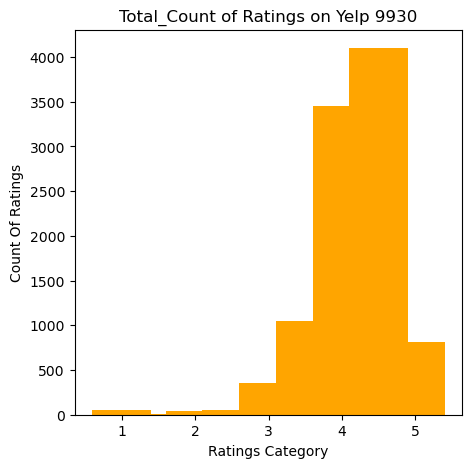

In [145]:
ratings=final_yelp_df['rating'].value_counts().sort_index()
a=ratings.sum()
fig,ax = plt.subplots(figsize=(5,5))
ax.bar(ratings.index, ratings, color='orange')
ax.set_ylabel('Count Of Ratings')
ax.set_xlabel('Ratings Category')
ax.set_title('Total_Count of Ratings on Yelp'+ " "+ str(a))
plt.savefig(r"C:\Users\shrut\Documents\light house labs\PROJECTS\Project 2\ppt.png")
plt.show


##### From the above visualization we can see that ratings on yelp majorly lie between the 3.5-4.5 category with a very small percentage of ratings so far below the 3.0 rating.

In [146]:
#saving into a csv file
df_yelp.to_csv('Yelp_data.csv',index=False)


NameError: name 'df_yelp' is not defined

# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

##### Both the API's provide similar aspects for parameters that can be used for put request and acquire data but the outputs are completely different,while four square allows a wide range of categories in fields of businesses to health care,education etc. with subsets to each of them to narrow it down, yelp only provides data in the hospitality industry.
##### Yelp provided me with the location, ratings from the same api request whereas in four sqaure a different set of request would have been required using the data which was recieved above making it a more complex process.
##### I feel that for this project yelp api gave me a more complete data in a single request. 

##### We saw above the percentage of null data in the foursquare api, we can create a plot to compare them and see if the difference is significantly visible.

<function matplotlib.pyplot.show(close=None, block=None)>

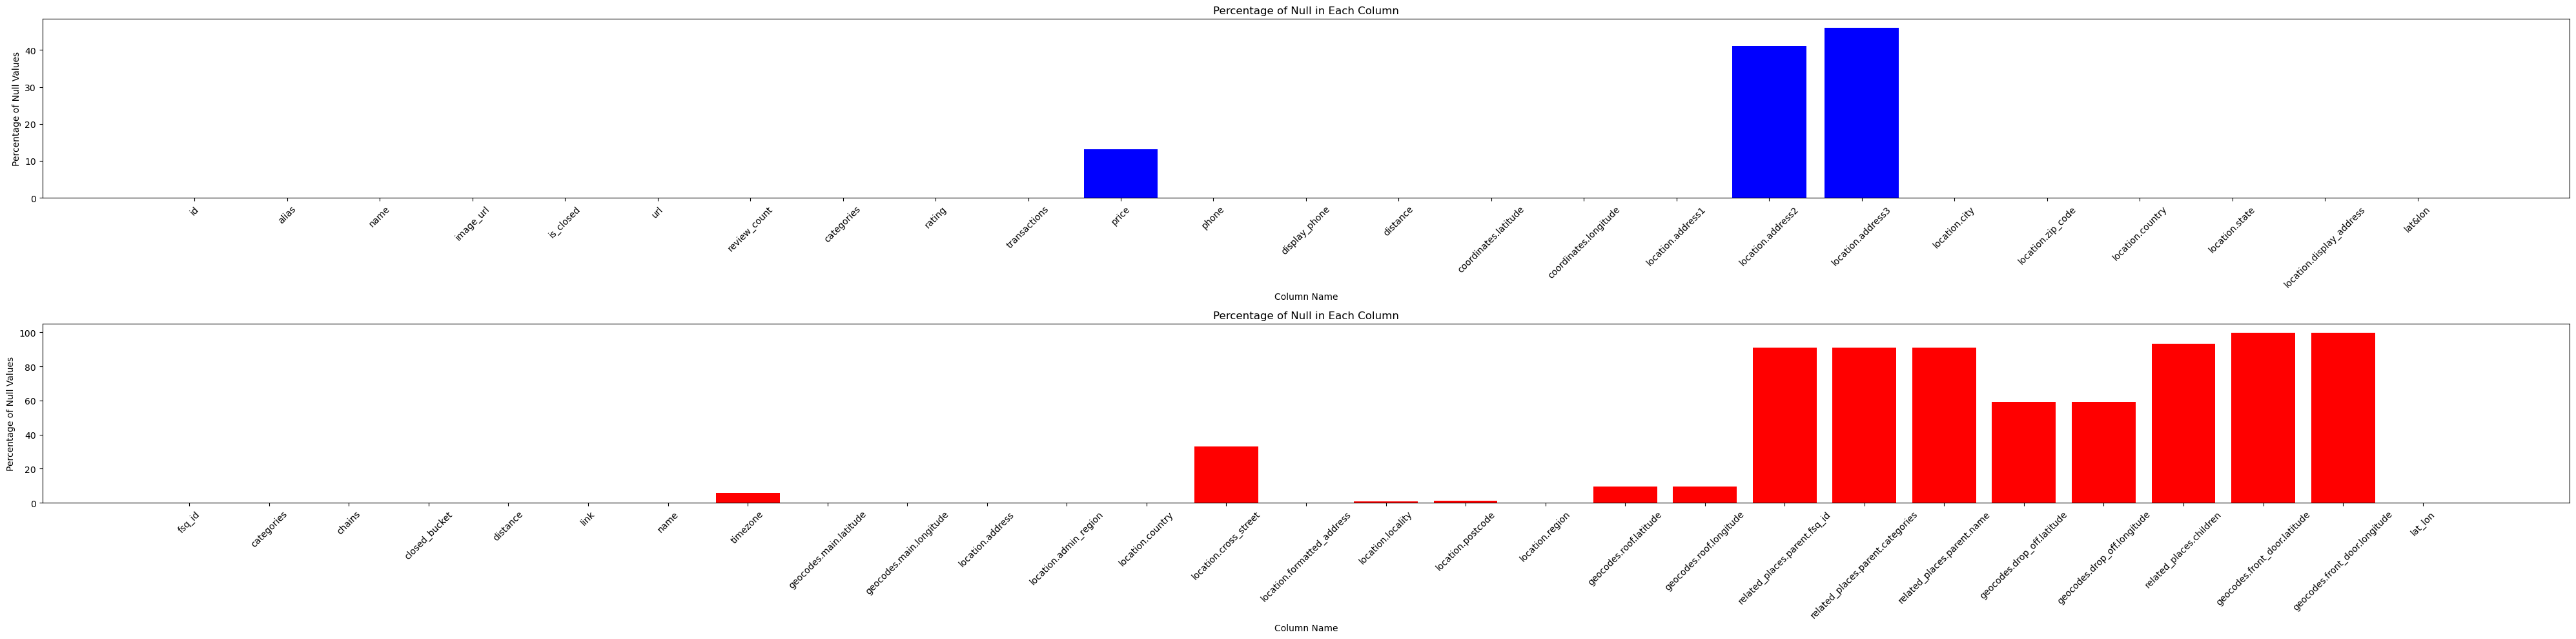

In [155]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(40,10))

# top graph
null_data_yelp = final_yelp_df.isnull().sum()*100/len(final_yelp_df)
final_yelp_columns=final_yelp_df.columns.tolist()

ax[0].bar(final_yelp_columns,null_data_yelp,color='blue')
ax[0].set_ylabel('Percentage of Null Values')
ax[0].set_xlabel('Column Name')
ax[0].set_title('Percentage of Null in Each Column')
ax[0].tick_params(axis='x', rotation=45)

#bottom graph
null_data_foursq = final_df.isnull().sum()*100/len(final_df)
final_df_columns=final_df.columns.tolist()

ax[1].bar(final_df_columns,null_data_foursq,color='red')
ax[1].set_ylabel('Percentage of Null Values')
ax[1].set_xlabel('Column Name')
ax[1].set_title('Percentage of Null in Each Column')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.savefig(r"C:\Users\shrut\Documents\light house labs\PROJECTS\Project 2\ppt.png")
plt.show

##### From the above visualization we can clearly see that yelp has 3 columns which have some null values in comparision to foursquare.

Get the top 10 restaurants according to their rating

In [111]:
df_yelp.sort_values(by='rating',ascending=False).head(10)

,lat&lon,name,rating,reviews,price,address,distance_on_yelp
4965,48.882633484311_2.3448844062122,La Boîte aux Lettres,5.0,51,3.0,108 rue Lepic,677.0
776,48.85384405433352_2.289705348222022,Neige d'Eté,5.0,32,4.0,12 rue de l'Amiral Roussin,1157.0
2848,48.84780306364685_2.445141971111298,Grandpré,5.0,5,NaN,66 rue de Fontenay,280.0
8595,48.92540695835961_2.3644426837563515,Chez Troquette,5.0,13,2.0,1 rue Saint-Maur,258.0
7120,48.851904891406384_2.347842156887055,Gallo Blu,5.0,1,NaN,16 Rue Beaurepaire,351.0
7122,48.851904891406384_2.347842156887055,Délicieux Montmartre,5.0,4,NaN,82 rue Charles Nodier,573.0
8588,48.85493692155721_2.436049282550812,La Fabrica,5.0,1,NaN,4 rue Désiré Lelay,1089.0
743,48.790147809608_2.4328628182411,Michel Germain,5.0,1,1.0,127 Rue Etienne Dolet,566.0
8585,48.85493692155721_2.436049282550812,Pâtisserie Lannois,5.0,1,3.0,41 Rue Gabriel Péri,1124.0
8583,48.85493692155721_2.436049282550812,Musée d'Art & d'Histoire Saint-Denis,5.0,1,NaN,22 bis Rue Gabriel Péri,998.0


In [123]:
df_yelp.groupby('lat&lon')['name'].min().to_frame()

,name
lat&lon,
48.7672039733195_2.4144977331161503,Bar de la Marine
48.77093586667601_2.40340143442154,Bar de la Marine
48.781383825117_2.3723508417606,Alhambra
48.78448485079149_2.35908430069685,Augusta Pizza
48.78755365471565_2.306235730648041,Amarone
...,...
48.9155156_2.3814103,Boulangerie
48.91835629408464_2.3523425683379173,Bon
48.92034156960326_2.3438543826341625,Au Pied du Sacré Coeur


### to merge the businesses returned from yelp and four square to see how many points of interest are common 

In [112]:
merged_df=pd.merge(foursq_df1,df_yelp, on=["lat&lon","address"])
merged_df

,lat&lon,name_x,address,distance,name_y,rating,reviews,price,distance_on_yelp
0,48.865983_2.275725,Bon,25 rue de la Pompe,638,Bon,4.0,120,4.0,647.0
1,48.865983_2.275725,Le Paris 16,18 rue des Belles Feuilles,493,Le Paris 16,4.0,37,3.0,484.0
2,48.865983_2.275725,Schwartz's,7 avenue d'Eylau,765,Schwartz's Deli,3.5,64,2.0,764.0
3,48.85375581057431_2.3390958085656166,Kodawari Ramen,29 rue Mazarine,880,Kodawari Ramen,4.0,95,2.0,123.0
4,48.867872484749_2.3648982158072,Ober Mamma,107 boulevard Richard Lenoir,158,Ober Mamma,4.5,307,2.0,539.0
...,...,...,...,...,...,...,...,...,...
358,48.82176874759649_2.3688706755638127,New Hoa Khoan,15 avenue de Choisy,196,Tricotin,3.5,134,2.0,396.0
359,48.82176874759649_2.3688706755638127,Tricotin,15 avenue de Choisy,590,Tricotin,3.5,134,2.0,396.0
360,48.85078526167496_2.2871585190296173,Le Volant Basque,13 rue Béatrix Dussane,704,Le Volant Basque,4.5,244,2.0,804.0
361,48.87660391892763_2.404769691129476,Benoît Castel,150 rue de Ménilmontant,829,Benoît Castel,4.0,19,2.0,538.0


In [101]:
merged_df.to_csv("merged_api_df.csv",index=False)